# Extract

In [1]:
# !pip install cx_Oracle
# !pip install PySimpleGUI
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

compras_produtos_vendidos

GRANT SELECT ON t_cliente TO SYSTEM;
GRANT SELECT ON t_compra TO SYSTEM;
GRANT SELECT ON t_contato_cliente_virtual TO SYSTEM;
GRANT SELECT ON t_contato_fornecedor TO SYSTEM;
GRANT SELECT ON t_contato_funcionario TO SYSTEM;
GRANT SELECT ON t_fornecedor TO SYSTEM;
GRANT SELECT ON t_funcionario TO SYSTEM;
GRANT SELECT ON t_produto TO SYSTEM;
GRANT SELECT ON t_produto_vendido TO SYSTEM;
GRANTS SQL PARA O PRÓPRIO SYSTEM CONSEGUIR EXECUTAR FORA DA IDE - SQL DEVELOPER

In [2]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [3]:
def conectar():
        # Configuração da conexão
        user = 'system'
        password = 'admin'
        dsn = 'localhost:1521/xe'

        # Cria a conexão
        connection = cx_Oracle.connect(user, password, dsn)
        return connection
conectar()

<cx_Oracle.Connection to system@localhost:1521/xe>

In [4]:
# NO MEU CASO, COMO NÃO É COMANDOS SQL, MUITO GRANDES, POSSO MUITO BEM USAR ASSIM: ao invez de organizar em arquivos .sql
sql_t_cliente = 'SELECT * FROM t_cliente'
sql_t_compra = 'SELECT * FROM t_compra'
sql_t_contato_cliente_virtual = 'SELECT * FROM t_contato_cliente_virtual'
sql_t_contato_fornecedor = 'SELECT * FROM t_contato_fornecedor'
sql_t_contato_funcionario = 'SELECT * FROM t_contato_funcionario'
sql_t_fornecedor = 'SELECT * FROM t_fornecedor'
sql_t_funcionario = 'SELECT * FROM t_funcionario'
sql_t_produto = 'SELECT * FROM t_produto'
sql_t_produto_vendido = 'SELECT * FROM t_produto_vendido'

In [5]:
cur = conectar().cursor()

In [6]:

# Executar consulta para tabela t_compra
cur.execute(sql_t_compra)
records = cur.fetchall()
compras = pd.DataFrame.from_records(records, columns=['cd_compra', 'cd_funcionario', 'cd_cliente', 'dt_hora_compra', 'sg_status_entrega', 'dt_data_entrega', 'ob_observacao', 'vl_desconto', 'vl_frete', 'fl_compra_fis_vir'])

# Executar consulta para tabela t_produto
cur.execute(sql_t_produto)
records = cur.fetchall()
produtos = pd.DataFrame.from_records(records, columns= ['cd_produto', 'cd_fornecedor', 'nm_produto', 'ds_produto', 'vl_preco', 'ds_ativo', 'ds_fabricante', 'ds_grupo', 'nr_estoque'])

# Executar consulta para tabela t_produto_vendido
cur.execute(sql_t_produto_vendido)
records = cur.fetchall()
produtos_vendidos = pd.DataFrame.from_records(records, columns=['cd_produto', 'cd_compra', 'ds_quantidade'])

# ANÁLISES

In [7]:
# Primeiro vamos fazer uma junção de dados, em um Dataset de vendas, iremos chamá-lo de dados
compras_produtos_vendidos = compras.merge(produtos_vendidos,on='cd_compra',how='inner')
dados = compras_produtos_vendidos.merge(produtos,on='cd_produto',how='inner')
dados['vl_total'] = ((dados['vl_preco'] * dados['ds_quantidade']) - dados['vl_desconto'])

In [8]:
# Removendo colunas que começam com cd_

colunas_remover = dados.filter(regex=r'^cd_').columns

# Removendo as colunas do DataFrame
dados = dados.drop(columns=colunas_remover)


In [9]:
print(f'Temos {dados.shape[0]} linhas dentro de nosso DataFrame de Vendas e {dados.shape[1]} colunas')

Temos 94 linhas dentro de nosso DataFrame de Vendas e 16 colunas


In [10]:
selecao = dados['nr_estoque'] == 90
dados[selecao].head(2)

,dt_hora_compra,sg_status_entrega,dt_data_entrega,ob_observacao,vl_desconto,vl_frete,fl_compra_fis_vir,ds_quantidade,nm_produto,ds_produto,vl_preco,ds_ativo,ds_fabricante,ds_grupo,nr_estoque,vl_total
30,2023-06-26 20:50:11,P,2023-06-27 20:50:11,Envio por e-mail,10.0,0.0,0,2,Blusa de Tricô,"Blusa de tricô na cor cinza, tamanho M",59.9,S,Fabricante A,Roupas,90,109.8
31,2023-06-26 20:47:05,P,2023-06-27 20:47:05,Envio por e-mail,0.0,0.0,0,2,Blusa de Tricô,"Blusa de tricô na cor cinza, tamanho M",59.9,S,Fabricante A,Roupas,90,119.8


# Descrições de nossos Dados

In [11]:
dados.describe().round()

,vl_desconto,vl_frete,ds_quantidade,vl_preco,nr_estoque,vl_total
count,94.0,94.0,94.0,94.0,94.0,94.0
mean,6.0,4.0,2.0,86.0,42.0,170.0
std,7.0,5.0,1.0,37.0,24.0,119.0
min,0.0,0.0,1.0,30.0,10.0,40.0
25%,0.0,0.0,1.0,52.0,20.0,90.0
50%,5.0,0.0,2.0,80.0,35.0,105.0
75%,14.0,8.0,3.0,100.0,60.0,251.0
max,20.0,12.0,4.0,160.0,90.0,480.0


In [12]:
dados.corr().round(1)

C:\Users\marco\AppData\Local\Temp\ipykernel_13372\407299068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().round(1)


,vl_desconto,vl_frete,ds_quantidade,vl_preco,nr_estoque,vl_total
vl_desconto,1.0,-0.4,-0.0,0.0,0.2,-0.0
vl_frete,-0.4,1.0,-0.1,-0.1,-0.2,-0.2
ds_quantidade,-0.0,-0.1,1.0,-0.1,0.0,0.6
vl_preco,0.0,-0.1,-0.1,1.0,-0.3,0.7
nr_estoque,0.2,-0.2,0.0,-0.3,1.0,-0.2
vl_total,-0.0,-0.2,0.6,0.7,-0.2,1.0


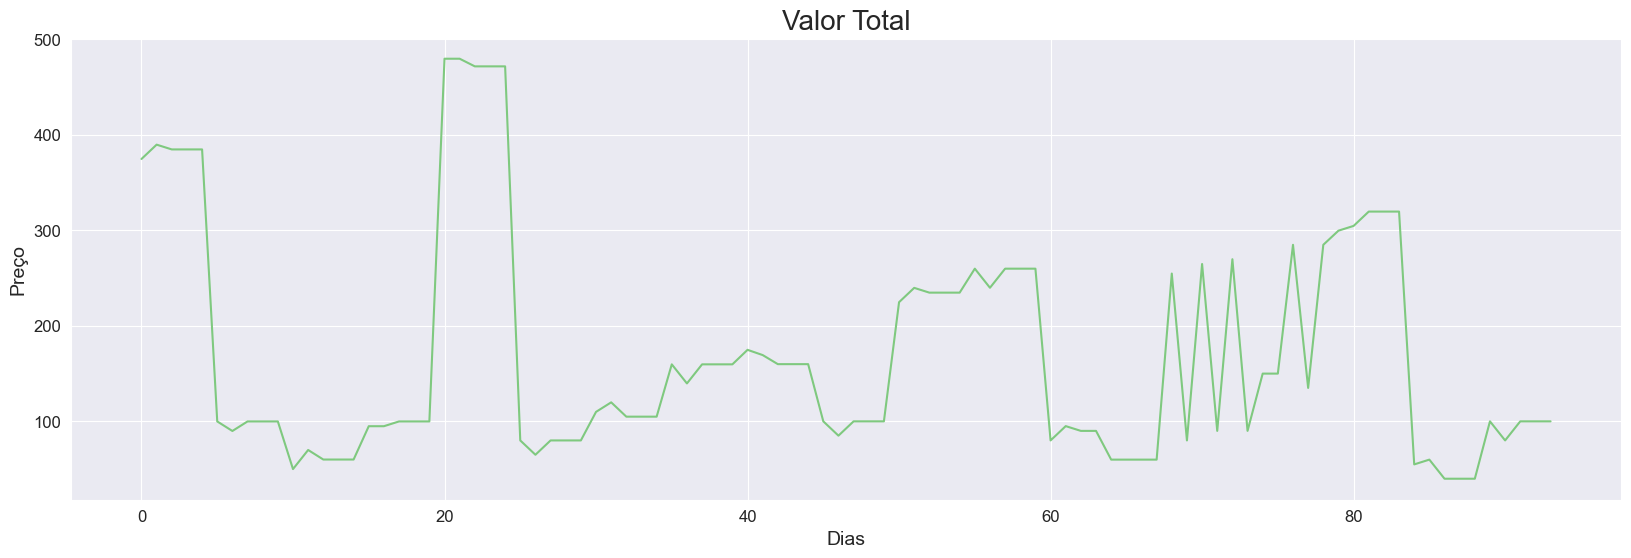

In [13]:
# Plotando a nossa Variável Dependente --> vl_total
fig, ax = plt.subplots(figsize=(20,6)) # resposta

ax.set_title('Valor Total',fontsize=20)
ax.set_ylabel('Preço',fontsize=14)
ax.set_xlabel('Dias',fontsize=14)
ax = dados['vl_total'].plot(fontsize=12)

Text(0, 0.5, 'Preços')

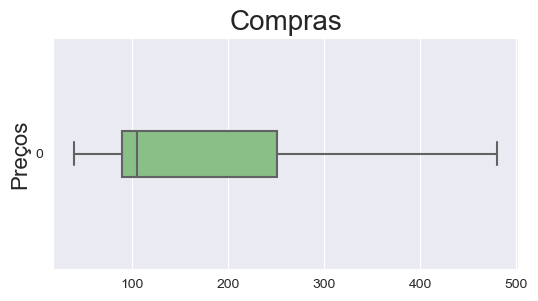

In [14]:
ax = sns.boxplot(data=dados['vl_total'],orient='h',width=0.2)
ax.figure.set_size_inches(6,3)
ax.set_title('Compras',fontsize=20)
ax.set_ylabel('Preços',fontsize=16)

Text(0, 0.5, 'Compra Física SIM ou NÃO')

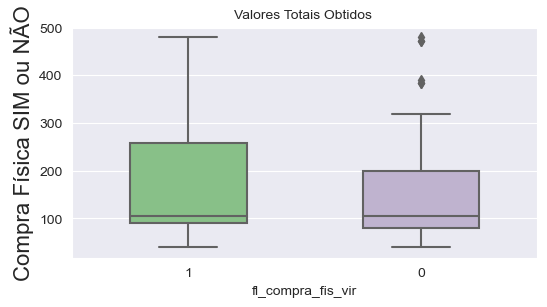

In [15]:
ax = sns.boxplot(y='vl_total',x='fl_compra_fis_vir',data=dados,orient='v',width=0.5)
ax.figure.set_size_inches(6,3)
ax.set_title('Valores Totais Obtidos ',fontsize=10)
ax.set_ylabel('Compra Física SIM ou NÃO',fontsize=16)

Perceba que temos mais lucro, quando temos a compra virtual, o normal da compra física é ter um Valor Total mais baixo

Text(0, 0.5, 'Compra Física SIM ou NÃO')

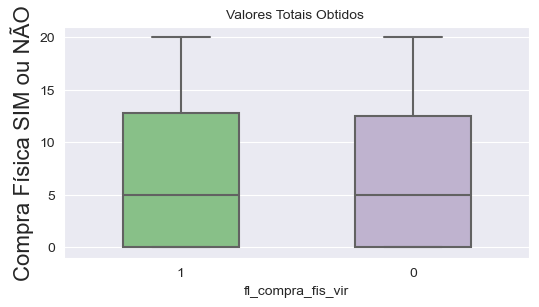

In [16]:
ax = sns.boxplot(y='vl_desconto',x='fl_compra_fis_vir',data=dados,orient='v',width=0.5)
ax.figure.set_size_inches(6,3)
ax.set_title('Valores Totais Obtidos ',fontsize=10)
ax.set_ylabel('Compra Física SIM ou NÃO',fontsize=16)

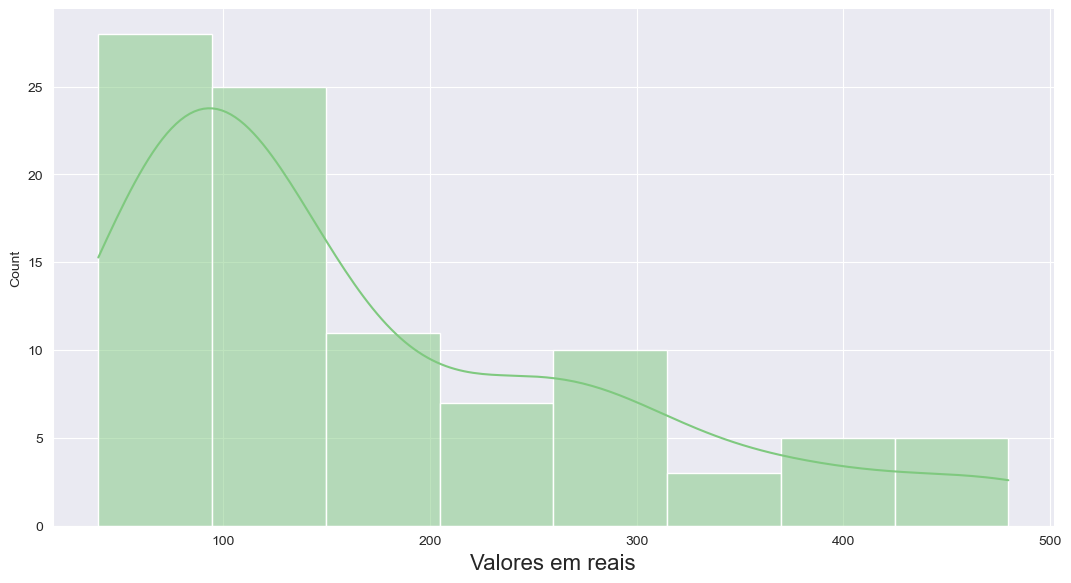

In [17]:
ax = sns.displot(dados['vl_total'],kde=True)
ax.figure.set_size_inches(12,6)
ax.set_titles('Valores Obtidos',fontsize=20)
ax.set_xlabels('Valores em reais',fontsize=16)

Text(0.5, 1.05, 'Dispersão entre as váriaveis e o Valor Total')

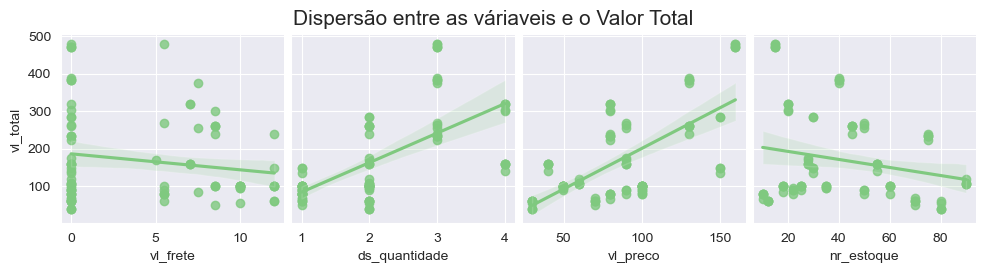

In [18]:
ax = sns.pairplot(dados, y_vars='vl_total',x_vars=['vl_frete','ds_quantidade','vl_preco','nr_estoque'],kind='reg')
ax.fig.suptitle('Dispersão entre as váriaveis e o Valor Total',fontsize=15,y=1.05)

Vamos Aplicar um LOG para ter certeza das Linearidades encontradas dentro de nossas variáveis Explicativas

In [19]:
# SE TEM 0, TODOS VÃO SER SOMADOS +1, JÁ QUE LOG(1) é 0, saberemos, não dando o erro de -inf do log(0)

# dados['log_Desconto'] = np.log(dados['vl_desconto'] + 1) #
# dados['log_Frete'] = np.log(dados['vl_frete'] + 1) 
# dados['log_Preco'] = np.log(dados['vl_preco'])
# dados['log_Estoque'] = np.log(dados['nr_estoque'])
# dados['log_Total'] = np.log(dados['vl_total'])

# Fazendo este Log para tentarmos acharmamos mais linearidade dentre as varioáveias, só pioremos a situação...

# Criando os Datasets de Treino e Teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = dados['vl_total']
X = dados[['vl_frete','ds_quantidade','vl_preco','nr_estoque']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

Trabalhando com regressão linear do StatsModels

In [23]:
import statsmodels.api as sm 
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante 

,const,vl_frete,ds_quantidade,vl_preco,nr_estoque
81,1.0,0.0,4,79.9,20
59,1.0,8.5,2,129.9,45
30,1.0,0.0,2,59.9,90
3,1.0,0.0,3,129.9,40
55,1.0,0.0,2,129.9,45
...,...,...,...,...,...
87,1.0,0.0,2,29.9,80
85,1.0,0.0,2,29.9,80
84,1.0,10.0,2,29.9,80
63,1.0,0.0,1,99.9,22


In [24]:
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante,hasconst= True).fit()

In [25]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               vl_total   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     269.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.84e-42
Time:                        20:41:29   Log-Likelihood:                -360.61
No. Observations:                  75   AIC:                             731.2
Df Residuals:                      70   BIC:                             742.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -203.8632     16.342    -12.475

Bem como temos dados explicativos específicos de valor total, onde sua somatória sempre, vai correlacionar com o valor total, fica fácil dizer o porque de que os números de F-statistic e P|T|, ficaram tão bens para este tipo de predição com os dados de compra de camisetas, mas temos que ter em mente, que estes dados não são naturais, pois vieram de uma IA que trouxe um certo padrão de valores para tudo, apenas algumas outliers, quando comparo os valores em um eixo X de flag de compra Física ou quando compra Virtual.
Mas lembre-se, em uma loja de camisetas, tería outro tipos de variáveis explicativas, que interfeririam muito bem nas compras e valores ganhos de uma loja, como a temperatura (onde teríamos que analisar o estilo de roupa encontrada), a data, a tendência de moda (indentificanod algum valor númerico para isto, poderia ser muito bem alguma data, ou ano que seja)...


CONCLUSÃO:
No entanto, é importante considerar que esses dados não são naturais, pois foram gerados por uma IA que introduziu um padrão de valores para os diferentes atributos.

Para uma análise mais completa e precisa, seria necessário incluir outras variáveis explicativas relevantes, como temperatura, data e tendência de moda. Essas variáveis poderiam ter um impacto significativo nas vendas e nos lucros de uma loja de camisetas, pois influenciam o comportamento dos consumidores.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'R2 {modelo.score(X_train, y_train).round(3)}')
y_previsto = modelo.predict(X_test)
print(f'R2 = {metrics.r2_score(y_test,y_previsto).round(3)}')

R2 0.939
R2 = 0.91


# Fazendo Predições com o Modelo

In [27]:
entrada = X_test[0:1]
entrada

,vl_frete,ds_quantidade,vl_preco,nr_estoque
31,0.0,2,59.9,90


In [28]:
modelo.predict(entrada)[0]

95.15844616767393

In [29]:
vl_frete = 9
ds_quantidade=12
vl_preco=100
nr_estoque = 90

entrada = [[vl_frete, ds_quantidade,vl_preco,nr_estoque]]

print(f'{modelo.predict(entrada)[0].round(2)} reais')

1043.97 reais


C:\Users\marco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# nestá célula teremos a exportação do modelo, dentro do diretório da Pasta Analysis-Sistema_Vendas
import pickle 

with open('modelo.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

Exportando o nosso modelo para o diretório do Jupyter